# Massenspektrometrie

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import codecs

In [62]:
class MassSpek():
    def __init__(self,path,skip_header=14):
        self.ayuda = []
        with codecs.open(path, encoding='utf-8-sig') as f:
            for line in f:
                if line[0] in [str(i) for i in range(0,10)]:
                    self.ayuda.append([float(x.replace(',','.')) for x in line.split()])
        self.ayuda = np.array(self.ayuda).T
        self.mass = self.ayuda[0]
        self.ion = self.ayuda[1]

    def plot_spek(self,title):
        # einzelne Durchläufe plotten...
        fig, ax = plt.subplots(figsize=(8,6))
        plt.title(title)
        ax.scatter(self.mass,self.ion)
        ax.set_yscale('log')

[[ 0.000000e+00  3.000000e-02  6.000000e-02 ...  4.956000e+01
   4.959000e+01  4.963000e+01]
 [-1.244294e-13 -5.421977e-14 -1.745243e-14 ... -8.761622e-15
  -8.948134e-15 -1.019397e-14]]


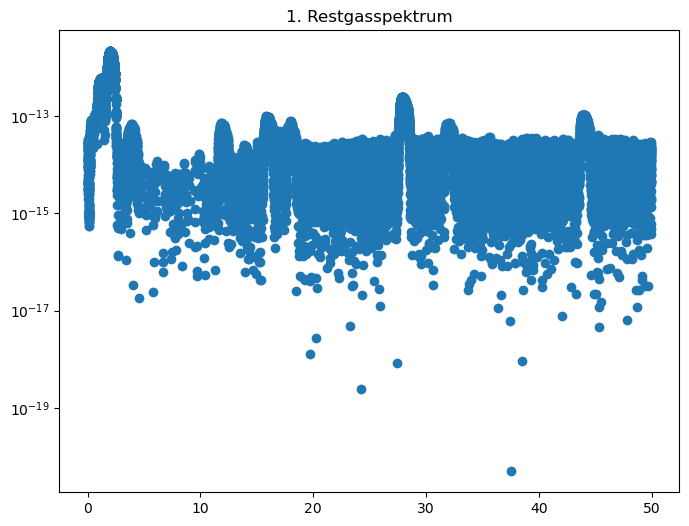

In [63]:
rest1 = MassSpek('data/massenspek/rest_1.asc')
print(rest1.ayuda)
rest1.plot_spek('1. Restgasspektrum')